# Experiment 1

## Objective
Investigate relationship between inter and intra class distance of distributed representations, learned from image data, in the eKCs, and number of input samples $N_{sample}$ seen by the model. The standing hypothesis is that both inter and intra class distance increase proportional to $N_{sample}$. 

## Model
Every neuron in the model is a leaky integrate-and-fire neuron with an exponetial post-synaptic curve.

### Inputs
Each image is sourced from a single alphabet of the Omniglot dataset, with no overlapping characters. For the sake of this experiment, we treat each character as a sole member of its own class. This way $N_{class} = 2$ means our random copies of either one of 2 image vectors. To add a small amount of variance to the samples, a small amount of uniform noise $\epsilon_{noise} \in \mathcal{U(0,25)}$ (milliseconds) is added to each input spike.

Inputs are modelled as $N_{PN} = d_{input}$ spiking Projection Neurons (PN), where $d_{input}$ is the dimensionality of the flattened image vectors. Each image is encoded as a simultaneous spiking of all active (pixel value = 1) neurons, with some jitter, within a 50ms window.

### Layers
For $N_{class} = 2$, half the iKCs are connected to the neurons active in class A, and the rest to those active in class B. For $N_{class} > 2$, connectivity is made with $p=0.15$

iKCs feed into eKCs with all to all connectivity and an additive STDP mechanism. The number of neurons in each layer are $N_{iKC}$ and $N_{eKC}$ respectively, where:
\begin{align}
N_{iKC} &= 2\cdot d_{input}\\
N_{eKC} &= \lceil \log_2N_{class} \rceil & (1)
\end{align}

The number of eKC neurons is thus approximately the minimal amount of neurons needed to represent every class by co-occurrence of instantaneous$^1$ spikes.

## Methodology and Evaluation
Inputs are sampled randomly from $N_{class}$ separate classes and shown to the model at 50ms intervals. $N_{sample}$ samples are shown to the model for the duration of the simulation, starting at the first 50ms onwards. iKC and eKC activity as a response to input spikes is recorded within these time frames. Every simulation step we calculate the average inter and intra class distances, $D_{inter}$ and $D_{intra}$, with a cosine distance metric, modified for numeric stability (in the case of no spiking neurons):

$$
\hat{D}_C(a,b) = D_C(a + \epsilon_{d}, b + \epsilon_{d}) 
$$

## Results

--

$^1$ Within a 50ms time window



In [4]:
import matplotlib.pyplot as plt
from util.data import Omniglot

ROOT = "data/omniglot"
dataset = Omniglot(ROOT)

sample = dataset[0,0,1]

In [5]:
sample

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

(-0.5, 104.5, 104.5, -0.5)

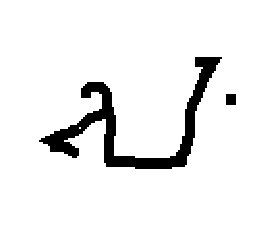

In [7]:
plt.imshow(sample, cmap='gray')
plt.axis('off')